# Symbol Synchronization

This script tests the efficacy of frequency offset estimators for QPSK and 16-APSK constellations.

This script does *not* handle phase ambiguity resolution.

In [2]:
import numpy as np
import scipy as sp
from matplotlib import pyplot as plt
from digicomm import * # import my helper functions

## QPSK Example

In this noiseless example, we create a series of symbols using a QPSK constellation. Then we attempt to estimate the frequency offset and derotate accordingly. If this works correctly, the deroated points should look like the original constellation, but perhaps with a constant phase offset.

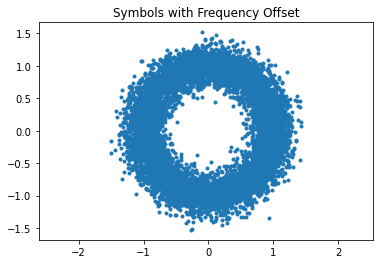

In [33]:
c = getConstellation(type='qpsk')
M = len(c)
nsyms = 2**13
nbits = nsyms * int(np.log2(M))
bits = np.random.randint(0,2,size=(nbits,))
syms = bitsToSymbols(bits,M)
tx = c[syms]

rx = addNoise(addPhaseOffset(addFrequencyOffset(tx,nuT=0.01)), SNR=10, Eb=1/2)
plt.plot(rx.real, rx.imag, '.')
plt.axis('equal')
plt.title('Symbols with Frequency Offset')
plt.show()


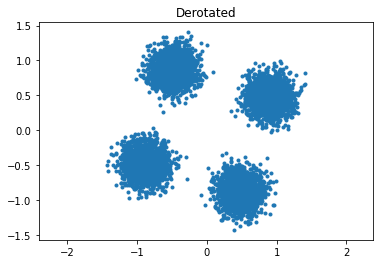

In [34]:
nuT_hat = freqOffsetEstimationQpsk(rx, mode='interp_1') # estimate frequency offset
rx_2 = addFrequencyOffset(rx,nuT=-nuT_hat) # derotation
plt.plot(rx_2.real, rx_2.imag, '.')
plt.axis('equal')
plt.title('Derotated')
plt.show()



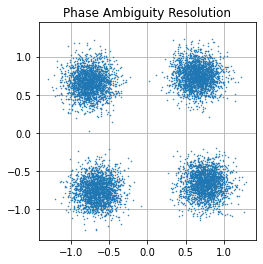

In [35]:
luw = 64
rx_3 = phaseAmbiguityResolution(rx_2, rx_2[0:luw], tx[0:luw]) # use the first few symbols as a poor man's unique word. This is cheating because we don't have explicit knowledge of tx.
plt.plot(rx_3.real, rx_3.imag, '.', markersize=1)
plt.axis('square')
plt.title('Phase Ambiguity Resolution')
plt.grid(True)
plt.show()